In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import platform
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

from det_classes_test import plot_ray_hits_2d, align_dream, get_residuals, get_efficiency, get_efficiency_1d, get_residuals_subdets_with_err, get_rays_in_sub_det_vectorized, get_rays_in_sub_det, get_raw_residuals, get_circle_scan, plot_2D_circle_scan

In [3]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 5  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dylan-MS-7C84':
    base_dir = '/media/ucla/Saclay/cosmic_data/'
    det_type_info_dir = '/home/dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/media/ucla/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 5  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dphnpct50.extra.cea.fr':
    base_dir = '/local/home/dn277127/x17/dream_run/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/nTof_x17_DAQ/config/detectors/'
    out_dir = '/local/home/dn277127/x17/Analysis/'
    chunk_size = 0.6  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'run_61'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'run'

det_single = 'rd5_strip_saral_1'
# det_single = 'rd5_plein_saral_2'

# file_nums = list(range(0, 3))
# file_nums = list(range(0, 109))
file_nums = [0, 1, 2]
# file_nums = 'all'
event_nums = None
# event_nums = np.arange(0, 1000000)

noise_sigma = 4
spark_filter_sigma = 1.8

# realign_dream = True  # If False, read alignment from file, if True, realign Dream detector
realign_dream = False  # If False, read alignment from file, if True, realign Dream detector

# run_json_path = f'{run_dir}run_config.json'
run_json_path = f'/local/home/dn277127/PycharmProjects/nTof_x17_DAQ/config/json_run_configs/run_config_beam.json'
data_dir = f'{run_dir}'
ped_dir = f'{run_dir}'

z_align_range = [15, 15]  # mm range to search for optimal z position
z_rot_align_range = [-2, 2]

try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [4]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [7]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
# det.feu_connectors = [5, 6, 7]
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')

det.load_dream_data(data_dir, ped_dir, noise_sigma, file_nums, chunk_size, hist_raw_amps=True, save_waveforms=True, trigger_list=event_nums, waveform_fit_func='parabola_vectorized', hist_raw_waveforms=True)
print(f'Hits shape: {det.dream_data.hits.shape}')

Found 2 groups in detector map
FEU Num: 5
FEU Channels: [1, 2, 3, 4]
HV: {'drift': 600, 'resist_1': 500, 'resist_2': 500}
Error: No ped files found.
Reading in data...
Getting sub chunk 1/2, events: 0-8837 of 17675


  0%|          | 0/1 [00:00<?, ?it/s]

Data Raw Shape: (8837, 448, 24)


100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Read in data shape: (8837, 256, 24)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 44.63it/s]


Fitting time: 0.1897439956665039 s
Processed sub-chunk 1/2
Getting sub chunk 2/2, events: 8837-17675 of 17675


  0%|          | 0/1 [00:00<?, ?it/s]

Data Raw Shape: (8838, 448, 24)


100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


Read in data shape: (8838, 256, 24)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 44.14it/s]


Fitting time: 0.3358113765716553 s
Processed sub-chunk 2/2
Processed chunk 1/1
Getting hits...
Hits shape: (17675, 256)


In [8]:
det.make_sub_detectors()

In [9]:
event = 11

In [10]:
event_ids, centroids = det.sub_detectors[0].get_event_centroids()
event_id_centroid_dict = dict(zip(event_ids, centroids))
event_id_index_dict = dict(zip(event_ids, range(len(event_ids))))
for event_i in range(20):
    if event_i in event_id_centroid_dict:
        print(f'Event: {event_i} -- Centroid: {event_id_centroid_dict[event_i]}')

Event: 1 -- Centroid: [ 93.98962867 109.20116366]
Event: 2 -- Centroid: [ 84.98182357 107.74018378]
Event: 3 -- Centroid: [ 11.20324292 126.31833009]
Event: 4 -- Centroid: [52.63416581 89.35099925]
Event: 5 -- Centroid: [86.1957913  28.84586854]
Event: 6 -- Centroid: [91.42733412 23.91944291]
Event: 7 -- Centroid: [ 48.02325508 104.68122111]
Event: 8 -- Centroid: [91.74462782 58.27728041]
Event: 9 -- Centroid: [116.46101863  30.13674398]
Event: 10 -- Centroid: [15.9890709  29.47038371]
Event: 11 -- Centroid: [117.08472693  67.18708334]
Event: 12 -- Centroid: [93.25510267 46.8       ]
Event: 13 -- Centroid: [ 70.64501406 116.06241278]
Event: 14 -- Centroid: [104.69181183  42.        ]
Event: 15 -- Centroid: [88.61043834 57.1325267 ]
Event: 16 -- Centroid: [ 11.02414137 116.30394285]
Event: 17 -- Centroid: [77.22493549 21.88550307]
Event: 18 -- Centroid: [24.02961451 21.8332948 ]
Event: 19 -- Centroid: [ 16.15733745 111.36865765]


In [11]:
event_index = event_id_index_dict[event]
print(f'Event: {event} -- Index: {event_index}')

Event: 11 -- Index: 10


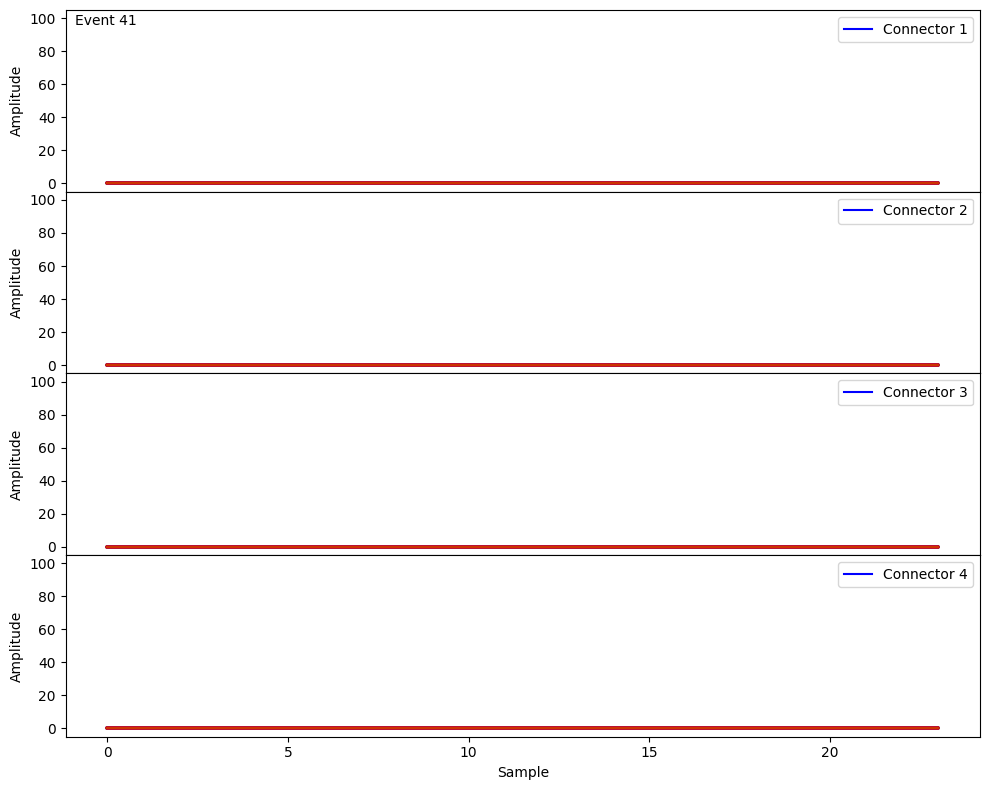

In [12]:
det.dream_data.plot_waveforms(41)  # 41

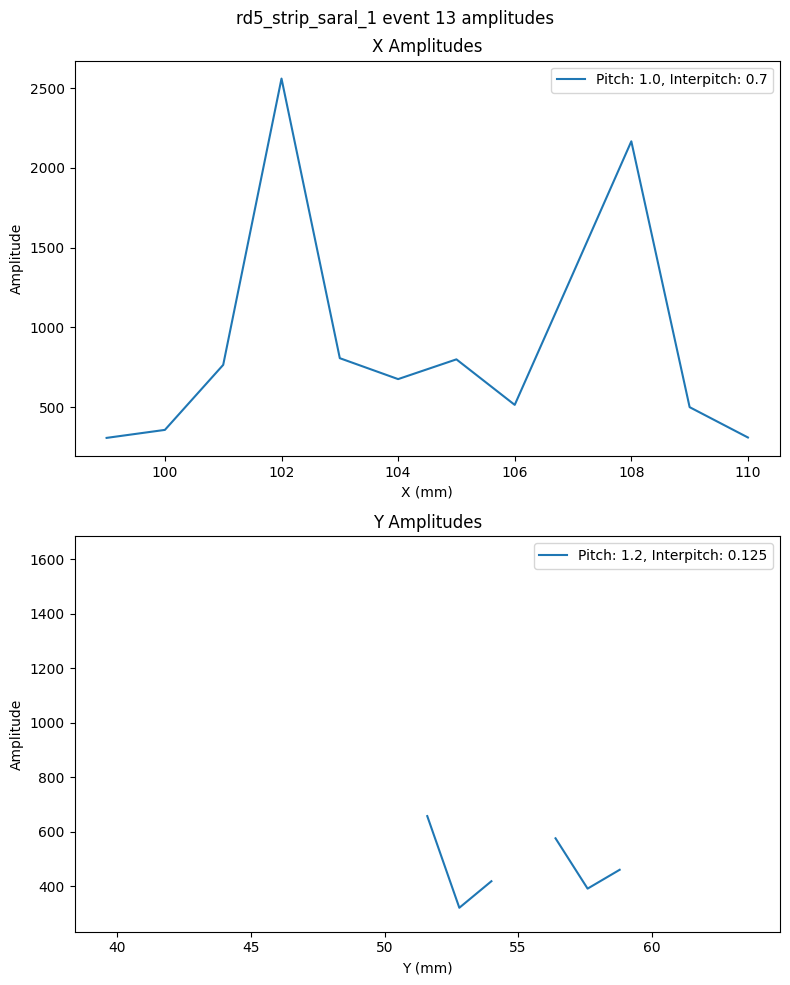

In [13]:
det.plot_event_1d(13)

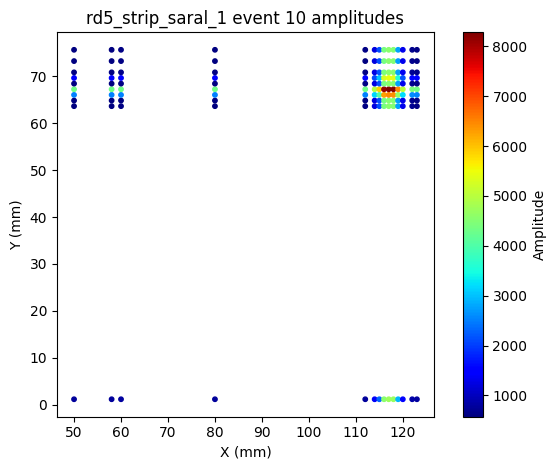

In [14]:
det.plot_event_2d(event_index)

(np.float64(9.220302640445997),
 np.float64(6.891029574180881),
 np.float64(0.04139917163519488),
 np.float64(0.04146415854979519))

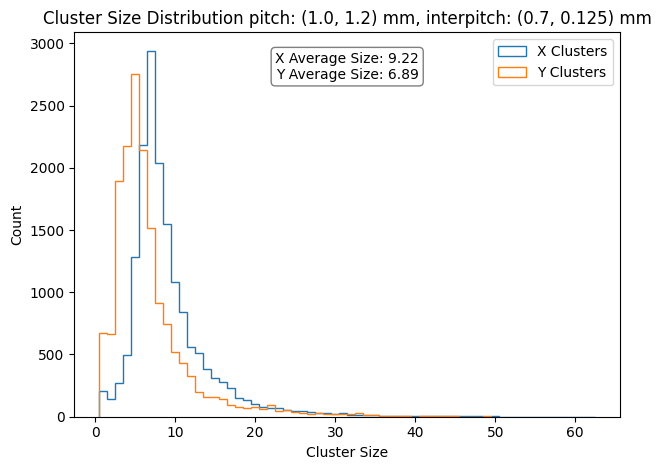

In [15]:
det.sub_detectors[0].plot_cluster_sizes()

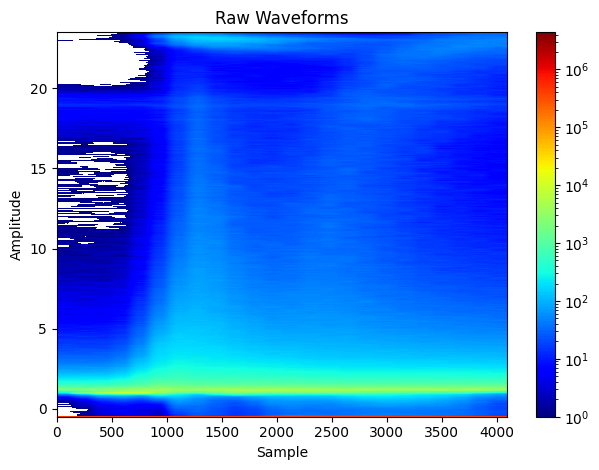

In [16]:
det.dream_data.plot_raw_waveform_2d_hist()

/local/home/dn277127/PycharmProjects/saclay_micromegas/Detector_Classes/DreamData.py:508: RuntimeWarning: All-NaN slice encountered
  event_max_amps = np.nanmax(self.data_amps, axis=1)
/local/home/dn277127/PycharmProjects/saclay_micromegas/Detector_Classes/DreamData.py:926: RuntimeWarning: All-NaN slice encountered
  event_max_amps = np.nanmax(self.data_amps, axis=1)
/local/home/dn277127/PycharmProjects/saclay_micromegas/Detector_Classes/DreamData.py:992: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


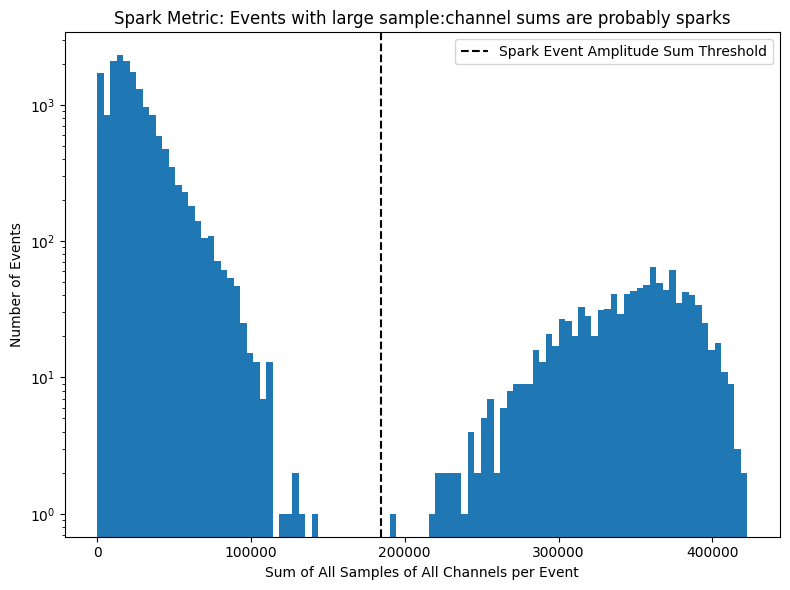

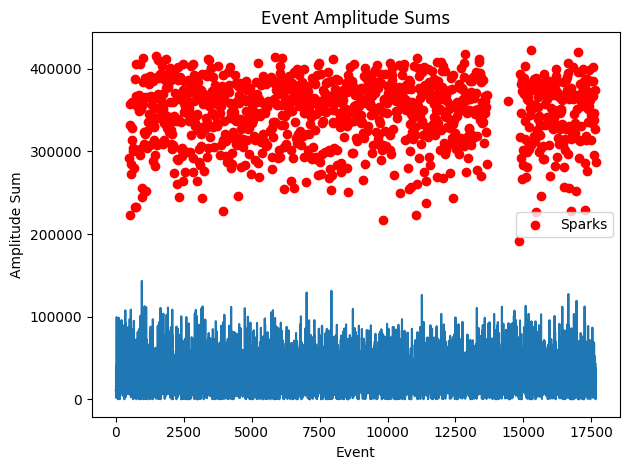

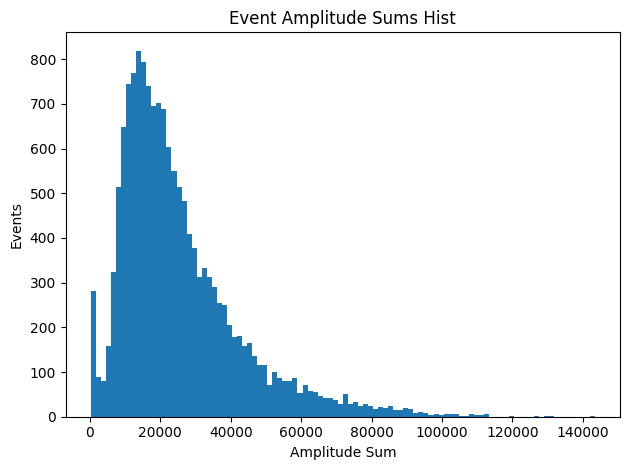

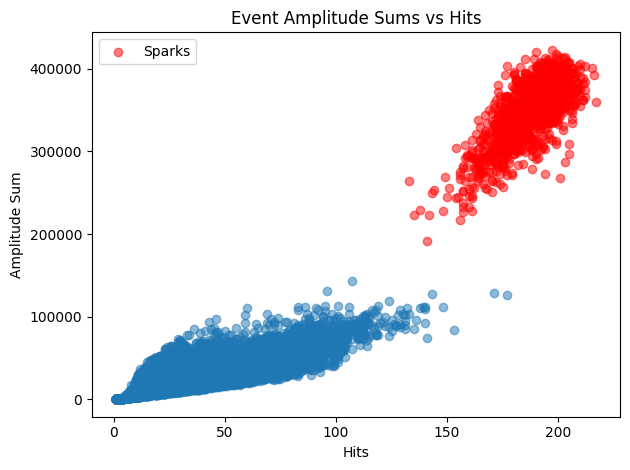

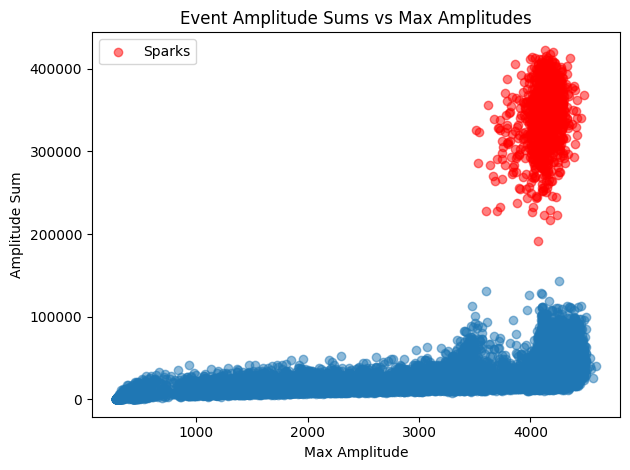

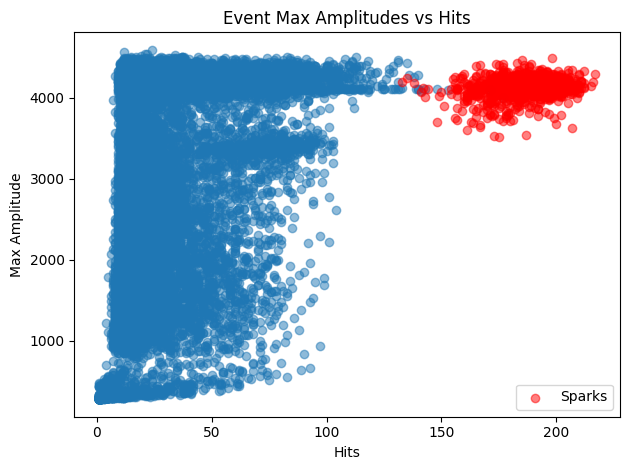

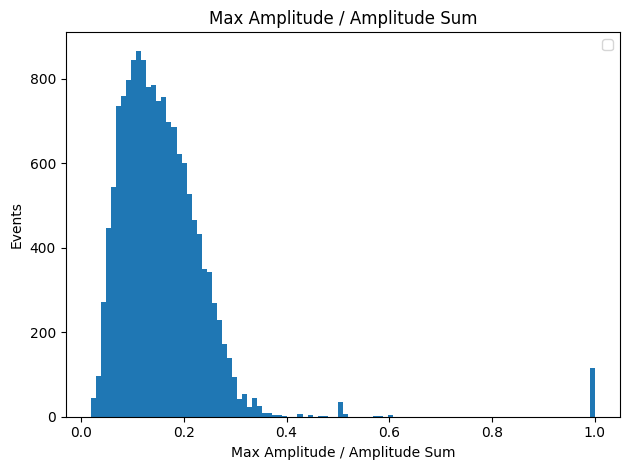

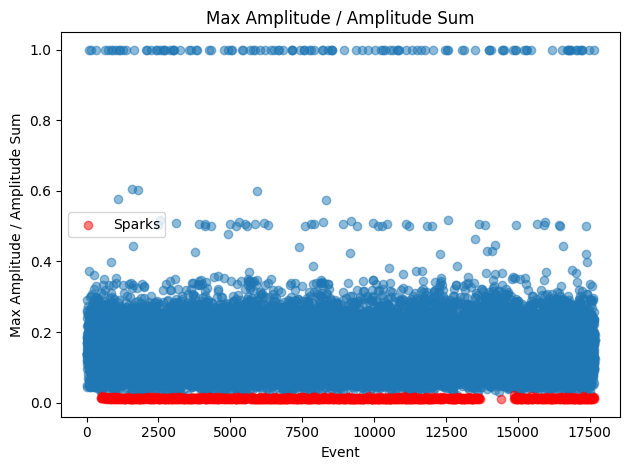

In [17]:
spark_mask = det.dream_data.filter_sparks(spark_filter_sigma=spark_filter_sigma, filter=False, filter_on_max_amps=True)
_ = det.dream_data.plot_noise_metric(spark_mask=spark_mask)
_ = det.dream_data.filter_sparks(spark_filter_sigma=spark_filter_sigma, plot=False, filter=True, filter_on_max_amps=True)

Connector 1 Dead Strips: []
Connector 2 Dead Strips: []
Connector 3 Dead Strips: []
Connector 4 Dead Strips: [242 251 252 253 254 255]


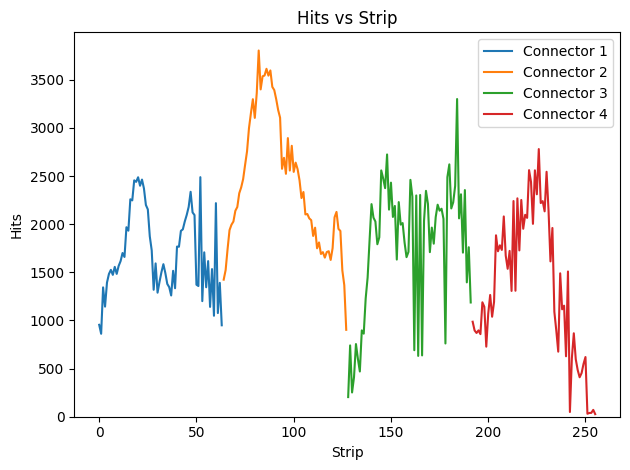

In [18]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

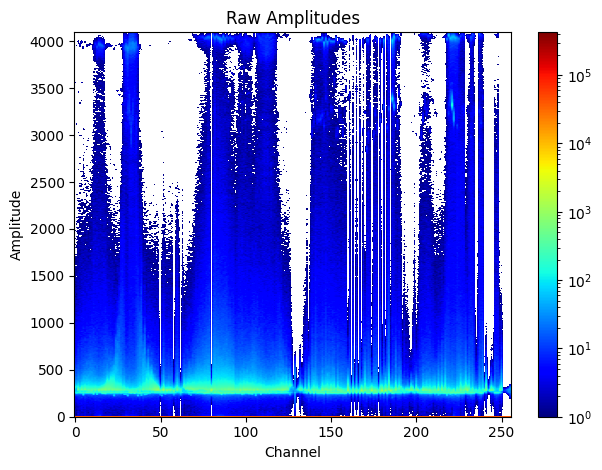

In [19]:
det.dream_data.plot_raw_amps_2d_hist()

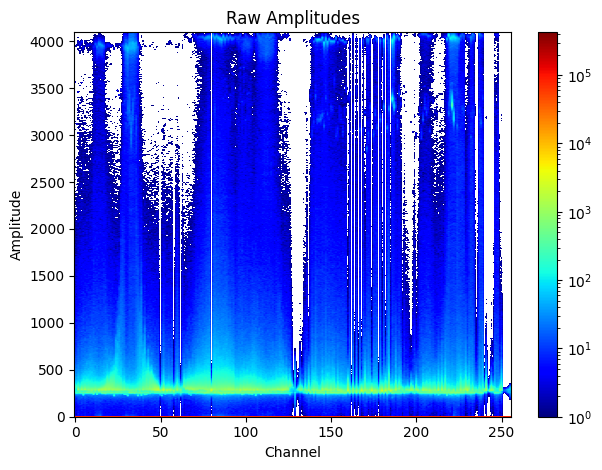

In [20]:
det.dream_data.plot_raw_amps_2d_hist(combine_y=2)

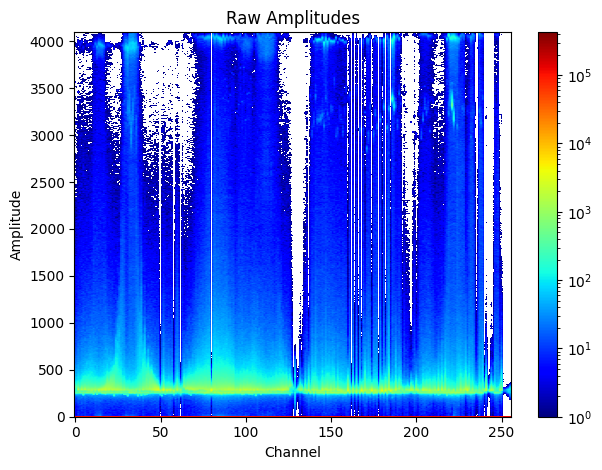

In [21]:
det.dream_data.plot_raw_amps_2d_hist(combine_y=3)

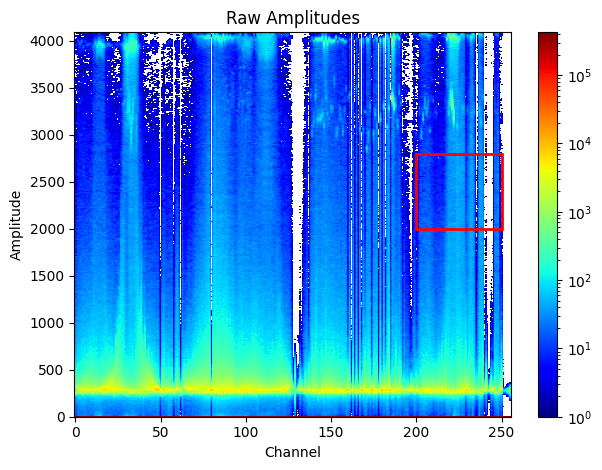

In [22]:
channel_range = (200, 250)
amplitude_range = (2000, 2800)
det.dream_data.plot_raw_amps_2d_hist(combine_y=10)

# Add a rectangle around channel/amplitude range
rect = plt.Rectangle((channel_range[0], amplitude_range[0]), channel_range[-1] - channel_range[0], amplitude_range[-1] - amplitude_range[0], fill=False, color='red', linewidth=2)
plt.gca().add_patch(rect)

4254208
4254208


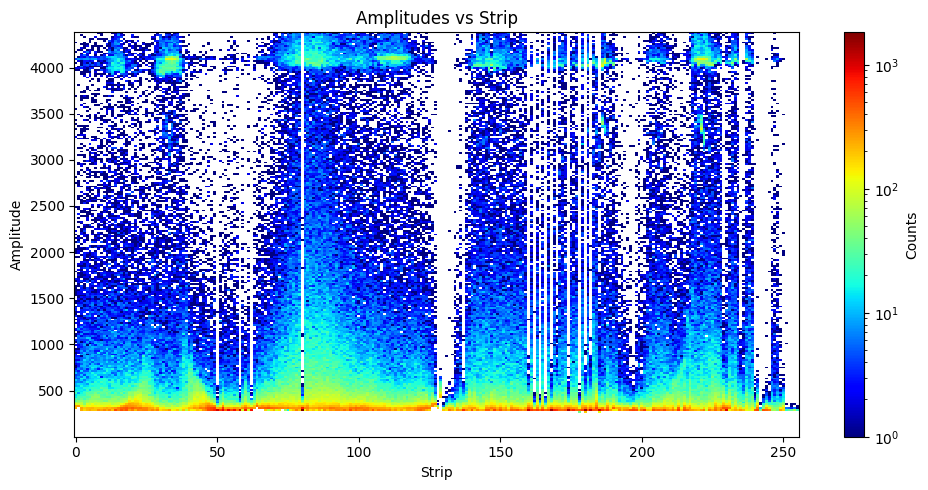

In [23]:
det.dream_data.plot_amplitudes_vs_strip()

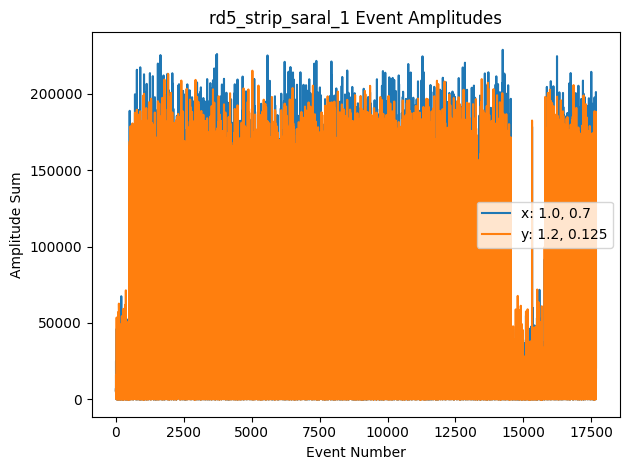

In [24]:
# det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

# if realign_dream:
#     det.center[2] = 722
#     det.add_rotation(90, 'z')

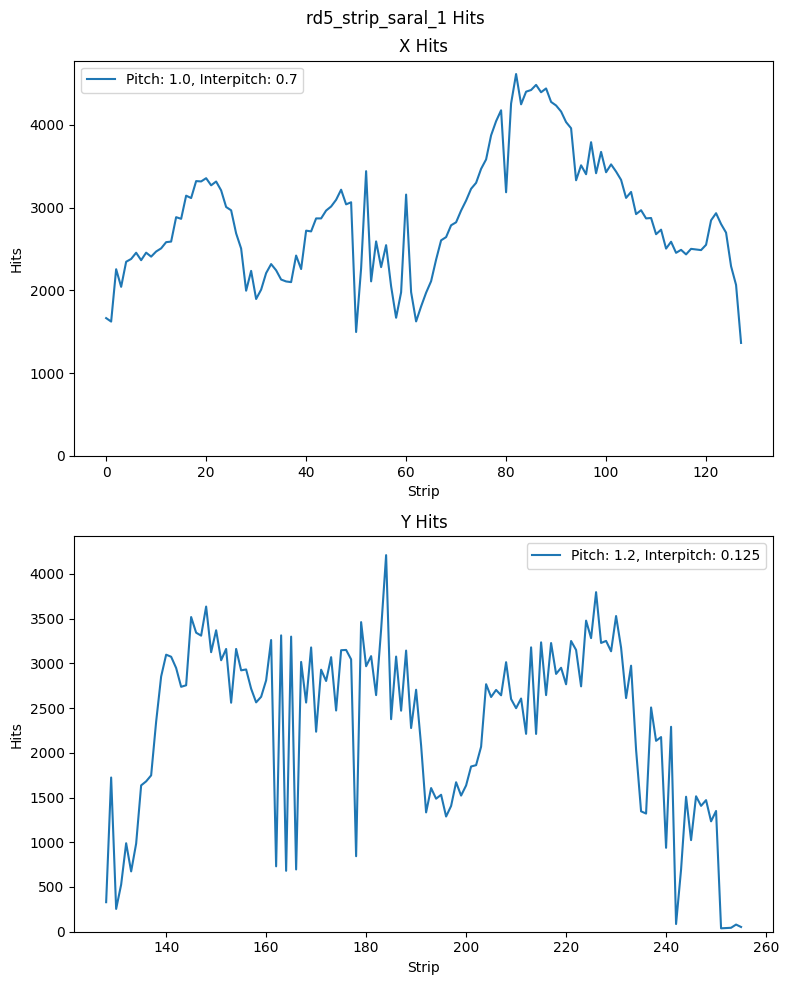

In [25]:
det.plot_hits_1d()

In [26]:
print(det.x_hits.shape)
print(det.y_hits.shape)

(17675, 128)
(17675, 128)


In [27]:
det.remove_last_rotation()

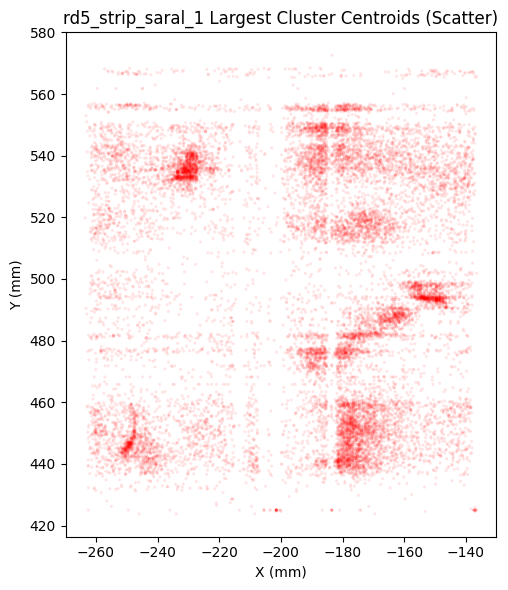

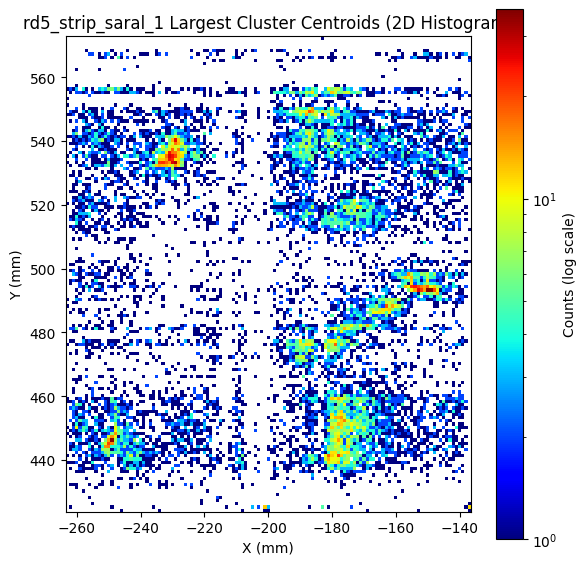

In [28]:
det.plot_centroids_2d()

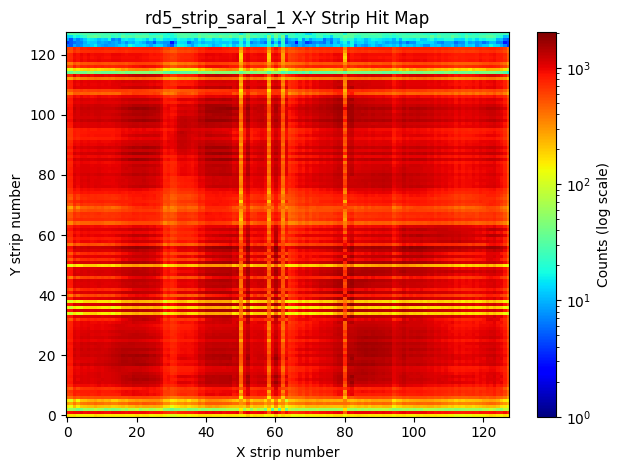

In [29]:
det.plot_xy_hit_map()

In [30]:
# det.get_det_clusters()

Text(0.5, 1.0, 'Time of Max for Y (Bottom) Strips')

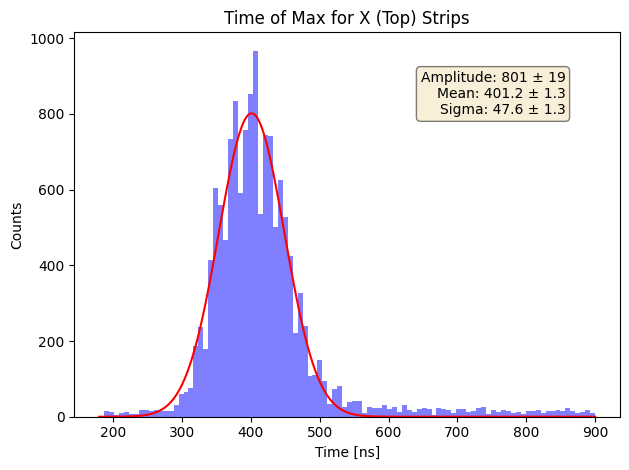

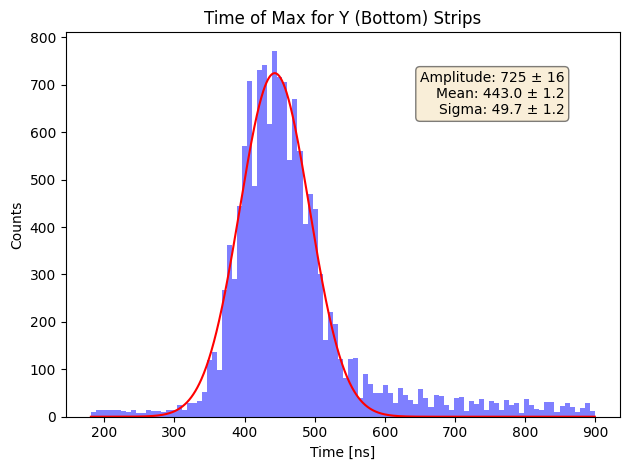

In [31]:
det.dream_data.correct_for_fine_timestamps()

sigma_x, sigma_x_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=None, plot=True)
plt.title(f'Time of Max for X (Top) Strips')

sigma_y, sigma_y_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=None, plot=True)
plt.title(f'Time of Max for Y (Bottom) Strips')

Text(0.5, 1.0, 'Time of Max for Y (Bottom) Strips Min Amp 600')

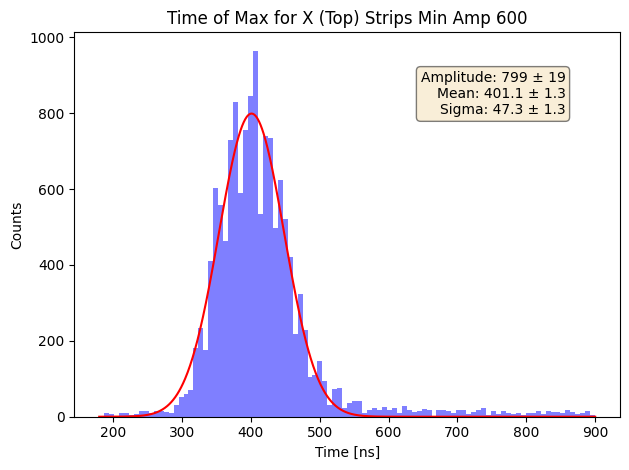

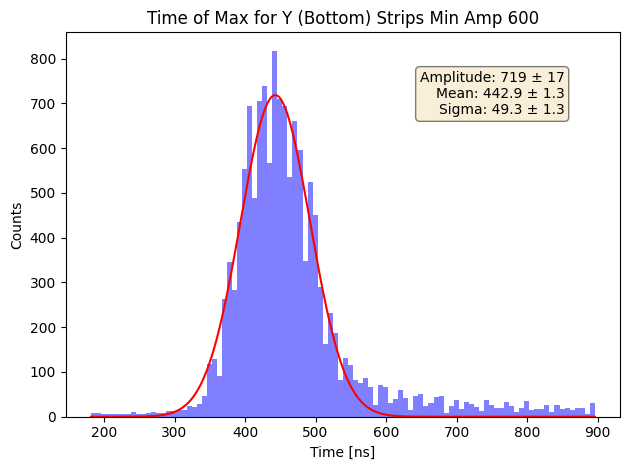

In [32]:
min_amp = 600
sigma_x, sigma_x_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=min_amp, plot=True)
plt.title(f'Time of Max for X (Top) Strips Min Amp {min_amp}')

sigma_y, sigma_y_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=min_amp, plot=True)
plt.title(f'Time of Max for Y (Bottom) Strips Min Amp {min_amp}')